In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 20.0
plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0

In [3]:
import pickle

In [4]:
import os

In [5]:
import io

# Process data

In [18]:
os.listdir('./data')

['ncbi_dataset',
 '.DS_Store',
 '9913.protein.links.v11.5.txt',
 '9606.protein.links.v11.5.txt',
 'BIOGRID-ALL-4.4.217.mitab.txt']

## txt files

## generate network subset for 9913

We will read 10 million edges as a simple snapshot. Probably there are many more edges and a more efficient way to read, but let's not worry about that for now. 

In [162]:
all_protein_names = []
# key: tuple of names
# value: score
edges_dict = {}

In [169]:
st = './data/9913.protein.links.v11.5.txt'

In [173]:
st.split('/')[2].split('.')[0]

'9913'

In [163]:
%%time
raw_9913_buffer = io.open('./data/9913.protein.links.v11.5.txt')
cur = raw_9913_buffer.readline()
if 'protein1' in cur:
    for idx in range(50000000):
        name1, name2, score = raw_9913_buffer.readline().split()
        all_protein_names.append(name1)
        all_protein_names.append(name2)
        
        if name1 in edges_dict.keys(): 
            edges_dict[name1][name2] = {'weight': float(score)}
        else: 
            edges_dict[name1] = {name2: {'weight': float(score)}}

        if idx % 100000 == 0: 
            all_protein_names = list(set(all_protein_names))
        if idx % 100000 == 0: 
            print(idx)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

ValueError: not enough values to unpack (expected 3, got 0)

In [164]:
%%time
G_9913 = nx.from_dict_of_dicts(edges_dict)

CPU times: user 34.6 s, sys: 6.42 s, total: 41.1 s
Wall time: 45.1 s


In [91]:
uq_protein_names = list(set(all_protein_names))

In [92]:
len(uq_protein_names)

19781

### analyze 9913 graph

In [100]:
# %%time
# layout = nx.spring_layout(G_9913)
# way too slow!

In [96]:
count = 0 
for _ in G_9913.adjacency(): 
    if count < 1000:
        print(_)
        count += 1

('9913.ENSBTAP00000000005', {'9913.ENSBTAP00000012194': {'weight': 208.0}, '9913.ENSBTAP00000056511': {'weight': 600.0}, '9913.ENSBTAP00000054915': {'weight': 600.0}, '9913.ENSBTAP00000049988': {'weight': 600.0}, '9913.ENSBTAP00000023175': {'weight': 190.0}, '9913.ENSBTAP00000045816': {'weight': 600.0}, '9913.ENSBTAP00000039032': {'weight': 157.0}, '9913.ENSBTAP00000010481': {'weight': 600.0}, '9913.ENSBTAP00000054066': {'weight': 424.0}, '9913.ENSBTAP00000028534': {'weight': 600.0}, '9913.ENSBTAP00000026692': {'weight': 600.0}, '9913.ENSBTAP00000024322': {'weight': 198.0}, '9913.ENSBTAP00000022789': {'weight': 307.0}, '9913.ENSBTAP00000027388': {'weight': 210.0}, '9913.ENSBTAP00000014647': {'weight': 600.0}, '9913.ENSBTAP00000015781': {'weight': 292.0}, '9913.ENSBTAP00000016651': {'weight': 600.0}, '9913.ENSBTAP00000002800': {'weight': 331.0}, '9913.ENSBTAP00000018331': {'weight': 174.0}, '9913.ENSBTAP00000043509': {'weight': 232.0}, '9913.ENSBTAP00000051617': {'weight': 600.0}, '9913

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
eigvec_ctr_9913 = nx.eigenvector_centrality_numpy(G_9913)

In [89]:
eigvec_ctr_normalized_9913 = np.array(list(eigvec_ctr_9913.values()))
eigvec_ctr_normalized_9913 = eigvec_ctr_normalized_9913 * (1.0 / sum(eigvec_ctr_normalized_9913))

In [177]:
scipy.stats.describe(eigvec_ctr_normalized_9913)[1][1]

0.0004500896086711912

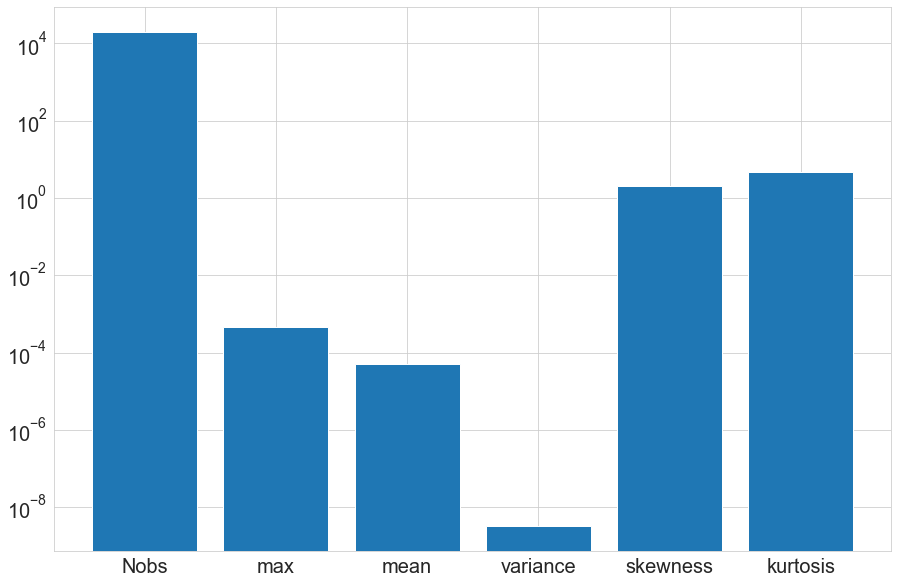

In [183]:
desc = list(scipy.stats.describe(eigvec_ctr_normalized_9913))
desc[1] = desc[1][1]
plt.bar(np.arange(6), desc)
# desc
plt.xticks(np.arange(6), ['Nobs', 'max', 'mean', 'variance', 'skewness', 'kurtosis'])
plt.yscale('log')

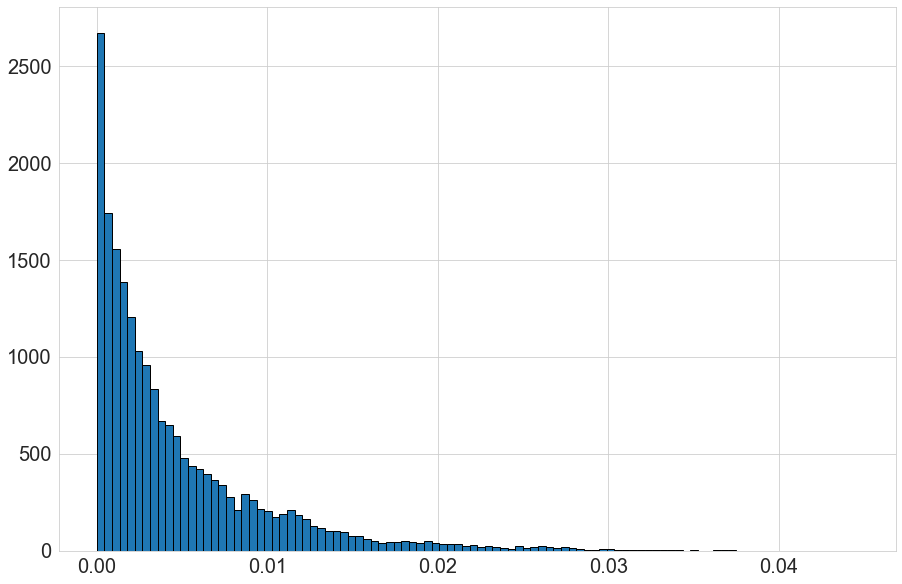

In [107]:
plt.hist(eigvec_ctr_9913.values(), ec='k', bins=100);

In [87]:
len(eigvec_ctr_9913)

NameError: name 'eigvec_ctr_9913' is not defined

In [109]:
len(uq_protein_names)

19781

Okay, so what are the very few that are above 0.029 in eigvec centrality? 

In [110]:
top_nodes = [(k, eigvec_ctr_9913[k]) for k in eigvec_ctr_9913.keys() if eigvec_ctr_9913[k] > 0.029]

In [111]:
top_nodes

[('9913.ENSBTAP00000001034', 0.02908352641945698),
 ('9913.ENSBTAP00000001044', 0.037199135894538056),
 ('9913.ENSBTAP00000001420', 0.03716346122855305),
 ('9913.ENSBTAP00000001839', 0.03634056335350641),
 ('9913.ENSBTAP00000001995', 0.030750251099673432),
 ('9913.ENSBTAP00000002010', 0.03360424457803537),
 ('9913.ENSBTAP00000002052', 0.040567714881590944),
 ('9913.ENSBTAP00000003401', 0.031037909638798225),
 ('9913.ENSBTAP00000004101', 0.03056647439645105),
 ('9913.ENSBTAP00000004874', 0.030202041578790514),
 ('9913.ENSBTAP00000005092', 0.03239078112971917),
 ('9913.ENSBTAP00000005279', 0.03234257514035264),
 ('9913.ENSBTAP00000005600', 0.02994976671412673),
 ('9913.ENSBTAP00000006260', 0.03244905106103429),
 ('9913.ENSBTAP00000006532', 0.03726401007997868),
 ('9913.ENSBTAP00000007504', 0.03236517468736894),
 ('9913.ENSBTAP00000007743', 0.031416444251639655),
 ('9913.ENSBTAP00000008102', 0.029664353774659532),
 ('9913.ENSBTAP00000008132', 0.03635213864307528),
 ('9913.ENSBTAP000000082

Notice that some are even more central, at 0.04! That is very surprising indeed. 

### clustering? 

In [122]:
# %%time
# cluster_coeffs_9913 = nx.clustering(G_9913)
# too long!

## generate network subset for 9606

In [19]:
all_protein_names_9606 = []
# key: tuple of names
# value: score
edges_dict_9606 = {}

In [22]:
%%time
raw_9606_buffer = io.open('./data/9606.protein.links.v11.5.txt')
cur = raw_9606_buffer.readline()
if 'protein1' in cur:
    for idx in range(50000000):
        name1, name2, score = raw_9606_buffer.readline().split()
        all_protein_names_9606.append(name1)
        all_protein_names_9606.append(name2)
        
        if name1 in edges_dict_9606.keys(): 
            edges_dict_9606[name1][name2] = {'weight': float(score)}
        else: 
            edges_dict_9606[name1] = {name2: {'weight': float(score)}}

        if idx % 100000 == 0: 
            all_protein_names_9606 = list(set(all_protein_names_9606))
        if idx % 100000 == 0: 
            print(idx)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000


ValueError: not enough values to unpack (expected 3, got 0)

In [23]:
all_protein_names_9606 = list(set(all_protein_names_9606))

In [24]:
len(all_protein_names_9606)

19385

In [25]:
%%time
G_9606 = nx.from_dict_of_dicts(edges_dict_9606)

CPU times: user 29.3 s, sys: 5.14 s, total: 34.4 s
Wall time: 35.5 s


In [26]:
eigvec_ctr_9606 = nx.eigenvector_centrality_numpy(G_9606)

In [77]:
eigvec_ctr_normalized_9606

array(dict_values([0.013462607529394644, 0.0037033232338433302, 0.017670167939715143, 0.004493438375725963, 0.001993827020264041, 0.0013931507226120474, 0.0013063493080686045, 0.006562836846163562, 0.015983134794185, 0.005674948617037793, 0.012205823729824589, 0.0039226962931728, 0.012400060686117568, 0.004858509940358793, 0.015223262096767172, 0.0024446731755472266, 0.006316606580599907, 0.0012990825147445482, 0.012483589806370526, 0.012297528034099229, 0.002651976779060223, 0.002206914340715145, 0.0044807116888775705, 0.007233792624064685, 0.002020959448804312, 0.00045152203650570356, 0.0021877183223653965, 0.000665027278012126, 0.0016165614206400138, 0.0019389760779714403, 0.002351207707793477, 0.007370480335995228, 0.007574680547556554, 0.0007159602442710794, 0.0015874867329708526, 0.008946950596011277, 0.003312370113676433, 0.0010075711627277042, 0.009622388703801797, 0.010345069254788026, 0.000526763666513479, 0.0030042858153102943, 0.0020672681238650802, 0.005096624933366509, 0.

In [78]:
eigvec_ctr_normalized_9606 = np.array(list(eigvec_ctr_9606.values()))
eigvec_ctr_normalized_9606 = eigvec_ctr_normalized_9606 * (1.0 / sum(eigvec_ctr_normalized_9606))

In [81]:
import scipy

In [84]:
scipy.stats.describe(eigvec_ctr_normalized_9606)

DescribeResult(nobs=19385, minmax=(4.135501050679579e-09, 0.0005892661550683678), mean=5.158627805003873e-05, variance=2.6711556206358567e-09, skewness=2.0296289451589664, kurtosis=6.394517061031255)

In [86]:
sum(eigvec_ctr_normalized_9606)

1.0000000000000053

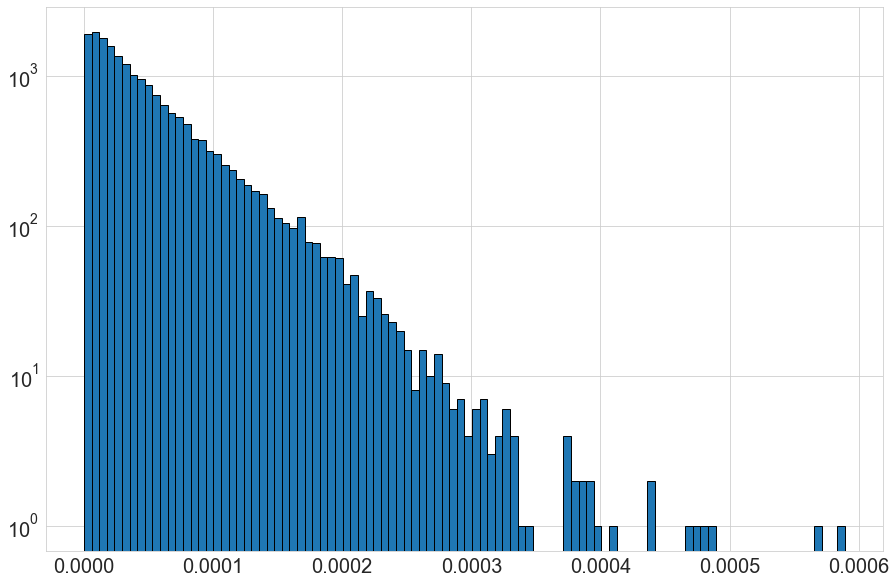

In [85]:
plt.hist(eigvec_ctr_normalized_9606, ec='k', bins=100, log=True);
# plt.xscale('log') .

So the human PPI is radically less centralized; the most central node is still only 0.0006, or 6e-4. 

As we will see below, this protein named `9606.ENSP00000275493`. 

In [29]:
sum(eigvec_ctr_9606.values())

98.35930089966098

Okay, so after suitable normalization this is more like one node with above 0.1 and then another 5 with centrality above 0.02. That is still remarkable! 

In [159]:
[(k, eigvec_ctr_9606[k] / 5.538790611978117) for k in eigvec_ctr_9606.keys() 
 if eigvec_ctr_9606[k] > 0.03 * 5.538790611978117]

[('9606.ENSP00000183605', 0.030523679251786565),
 ('9606.ENSP00000219782', 0.033057854254888615),
 ('9606.ENSP00000260229', 0.03055655004216116),
 ('9606.ENSP00000263341', 0.0397068883960548),
 ('9606.ENSP00000275493', 0.1158178167376295),
 ('9606.ENSP00000363019', 0.03249834126990539),
 ('9606.ENSP00000363680', 0.04149010278363208),
 ('9606.ENSP00000366095', 0.03249834126990537),
 ('9606.ENSP00000369346', 0.032824026592436724),
 ('9606.ENSP00000371532', 0.03039593285353504),
 ('9606.ENSP00000381840', 0.0328645353922205),
 ('9606.ENSP00000437910', 0.03039593285353505)]

In [161]:
sum([x[1] for x in [(k, eigvec_ctr_9606[k] / 5.538790611978117) for k in eigvec_ctr_9606.keys() 
 if eigvec_ctr_9606[k] > 0.03 * 5.538790611978117]])

0.48263000169769077

12 nodes control almost half of the centrality! 

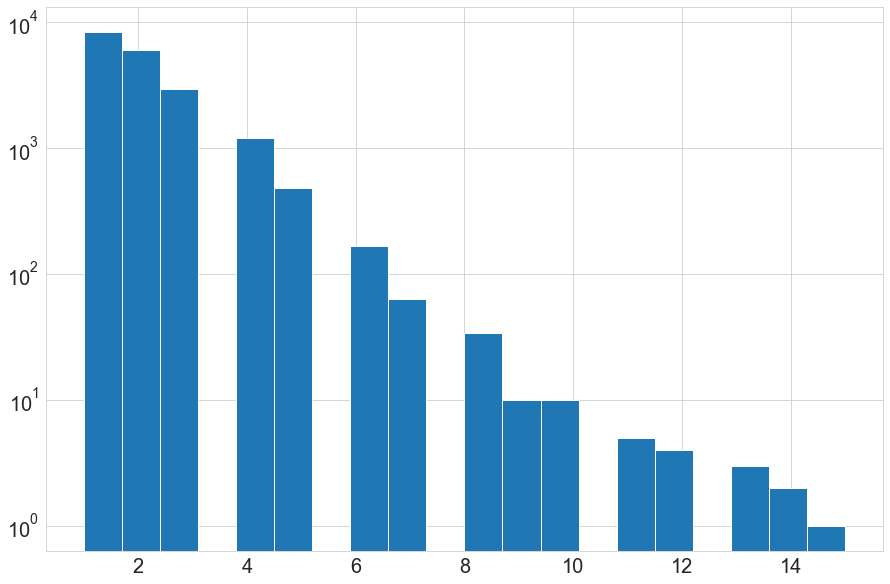

In [140]:
plt.hist([x[1] for x in list(G_9606.degree)], bins=20, log=True);

In [144]:
adj_marginals = {}
for x in G_9606.adjacency(): 
    k = x[0]
    k_dict = x[1]
    tot = 0.0
    for wt_dict in k_dict.values():
        tot += wt_dict['weight']
    adj_marginals[k] = tot

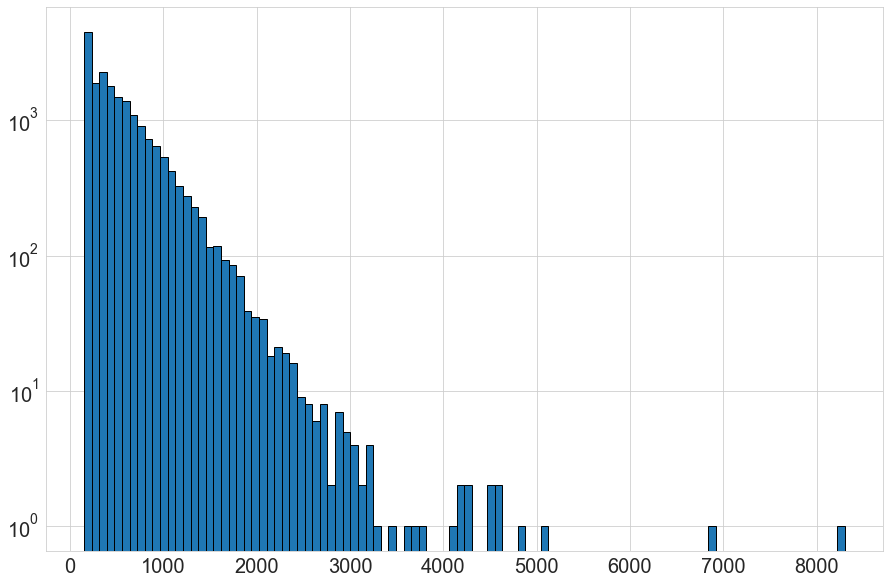

In [148]:
plt.hist(adj_marginals.values(), bins=100, ec='k', log=True);

The distribution of weighted degree is a little less surprising. It's basically a straightforward exponential curve, or in other words log-linear. 

### store both nx graphs as pickle dumps

In [30]:
with open('./pickle_files/G_nx_9606.pickle', 'wb') as handle:
    pickle.dump(G_9606, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [166]:
with open('./pickle_files/G_nx_9913.pickle', 'wb') as handle:
    pickle.dump(G_9913, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Open both nx graphs

In [7]:
file = open('./pickle_files/G_nx_9913.pickle','rb')
G_9913 = pickle.load(file)
file.close()

In [12]:
# !pip install igraph

In [32]:
# file = open('./pickle_files/G_nx_9606.pickle','rb')
# G_9606 = pickle.load(file)
# file.close()

In [39]:
np.arange(len(nx.degree_histogram(G_9606)))

array([   0,    1,    2, ..., 7505, 7506, 7507])

In [41]:
nx.nodes(G_9606)

NodeView(('9606.ENSP00000000233', '9606.ENSP00000000412', '9606.ENSP00000001008', '9606.ENSP00000001146', '9606.ENSP00000002125', '9606.ENSP00000002165', '9606.ENSP00000002596', '9606.ENSP00000002829', '9606.ENSP00000003084', '9606.ENSP00000003100', '9606.ENSP00000003302', '9606.ENSP00000004531', '9606.ENSP00000005178', '9606.ENSP00000005226', '9606.ENSP00000005257', '9606.ENSP00000005260', '9606.ENSP00000005284', '9606.ENSP00000005286', '9606.ENSP00000005340', '9606.ENSP00000005386', '9606.ENSP00000005587', '9606.ENSP00000005995', '9606.ENSP00000006015', '9606.ENSP00000006053', '9606.ENSP00000006275', '9606.ENSP00000006526', '9606.ENSP00000006658', '9606.ENSP00000006724', '9606.ENSP00000006777', '9606.ENSP00000007390', '9606.ENSP00000007414', '9606.ENSP00000007699', '9606.ENSP00000007722', '9606.ENSP00000007735', '9606.ENSP00000008391', '9606.ENSP00000008527', '9606.ENSP00000008938', '9606.ENSP00000009041', '9606.ENSP00000009105', '9606.ENSP00000009530', '9606.ENSP00000010299', '9606.

In [42]:
nx.nodes(G_9913)

NodeView(('9913.ENSBTAP00000000005', '9913.ENSBTAP00000000008', '9913.ENSBTAP00000000009', '9913.ENSBTAP00000000010', '9913.ENSBTAP00000000013', '9913.ENSBTAP00000000014', '9913.ENSBTAP00000000015', '9913.ENSBTAP00000000017', '9913.ENSBTAP00000000018', '9913.ENSBTAP00000000021', '9913.ENSBTAP00000000022', '9913.ENSBTAP00000000024', '9913.ENSBTAP00000000025', '9913.ENSBTAP00000000027', '9913.ENSBTAP00000000029', '9913.ENSBTAP00000000032', '9913.ENSBTAP00000000033', '9913.ENSBTAP00000000034', '9913.ENSBTAP00000000036', '9913.ENSBTAP00000000037', '9913.ENSBTAP00000000040', '9913.ENSBTAP00000000043', '9913.ENSBTAP00000000044', '9913.ENSBTAP00000000046', '9913.ENSBTAP00000000047', '9913.ENSBTAP00000000049', '9913.ENSBTAP00000000051', '9913.ENSBTAP00000000055', '9913.ENSBTAP00000000057', '9913.ENSBTAP00000000060', '9913.ENSBTAP00000000063', '9913.ENSBTAP00000000065', '9913.ENSBTAP00000000066', '9913.ENSBTAP00000000069', '9913.ENSBTAP00000000071', '9913.ENSBTAP00000000072', '9913.ENSBTAP00000

The 9913 nodes are all of the form 'ENSBTAP', while 9606 is 'ENSP'

### igraph visualization attempt (failed)

In [8]:
# import igraph as ig

In [9]:
# h = ig.Graph.from_networkx(G_9913)

In [14]:
# %%time
# layout = h.layout_kamada_kawai()
# ig.plot(h, layout=layout)

In [15]:
# components = nx.connected_components(G_9913)
# largest_component = max(components, key=len)

In [18]:
# H = G_9913.subgraph(largest_component)

In [10]:
# %%time
# layout = h.layout_fruchterman_reingold(niter=50)

In [11]:
# !pip install cairocffi

In [12]:
# !pip install --upgrade pip setuptools wheel

In [13]:
# !pip install upgrade pip

In [14]:
# !pip install pycairo

In [15]:
# %%time
# ig.plot(h)
# plt.title('Protein-Protein Interaction Network for Bos Taurus')
# plt.savefig('figs/G_9913.eps', format='eps', dpi=700.0)

In [16]:
# layout_nx = nx.layout.spring_layout(G_9913, iterations=20)

## Process String DB text data for protein description

In [44]:
table_9913 = pd.read_table('data/string-db-protein/9913.protein.info.v11.5.txt')

In [45]:
table_9606 = pd.read_table('data/string-db-protein/9606.protein.info.v11.5.txt')

In [166]:
table_9606.sort_values(by='preferred_name', inplace=True)

In [167]:
table_9606

,preferred_name,protein_size,annotation
#string_protein_id,,,
9606.ENSP00000263100,A1BG,495,Alpha-1B-glycoprotein; Immunoglobulin like dom...
9606.ENSP00000378868,A1CF,602,APOBEC1 complementation factor; Essential comp...
9606.ENSP00000479139,A26B3,584,Homo sapiens POTE ankyrin domain family member...
9606.ENSP00000323929,A2M,1474,Alpha-2-macroglobulin; Is able to inhibit all ...
9606.ENSP00000299698,A2ML1,1454,Alpha-2-macroglobulin-like protein 1; Is able ...
...,...,...,...
9606.ENSP00000360583,ZYG11A,759,Protein zyg-11 homolog A; Probably acts as tar...
9606.ENSP00000294353,ZYG11B,744,Protein zyg-11 homolog B; Probably acts as tar...
9606.ENSP00000324422,ZYX,572,Zyxin; Adhesion plaque protein. Binds alpha-ac...


In [51]:
shared_proteins = list(set(table_9606['preferred_name']).intersection(set(table_9913['preferred_name'])))

In [52]:
len(shared_proteins)

16420

In [53]:
len(table_9606)

19566

In [54]:
len(table_9913)

19992

Nice! Next steps: 

* rename NX graph vertices to be with the 'preferred names'
* subselect the graphs of each one that are on the shared vertices

In [55]:
table_9913.head()

,#string_protein_id,preferred_name,protein_size,annotation
0,9913.ENSBTAP00000000005,ADRBK2,651,Beta-adrenergic receptor kinase 2; Specificall...
1,9913.ENSBTAP00000000008,KCNJ1,372,"Potassium inwardly-rectifying channel, subfami..."
2,9913.ENSBTAP00000000009,FOXF1,415,Forkhead box F1
3,9913.ENSBTAP00000000010,UBL7,380,Bos taurus ubiquitin-like 7 (bone marrow strom...
4,9913.ENSBTAP00000000013,TTC33,262,Tetratricopeptide repeat domain 33


In [59]:
# table_9913.set_index('#string_protein_id', inplace=True)

In [60]:
table_9913.head()

,preferred_name,protein_size,annotation
#string_protein_id,,,
9913.ENSBTAP00000000005,ADRBK2,651,Beta-adrenergic receptor kinase 2; Specificall...
9913.ENSBTAP00000000008,KCNJ1,372,"Potassium inwardly-rectifying channel, subfami..."
9913.ENSBTAP00000000009,FOXF1,415,Forkhead box F1
9913.ENSBTAP00000000010,UBL7,380,Bos taurus ubiquitin-like 7 (bone marrow strom...
9913.ENSBTAP00000000013,TTC33,262,Tetratricopeptide repeat domain 33


In [61]:
table_9606.set_index('#string_protein_id', inplace=True)

In [62]:
table_9606['preferred_name']

#string_protein_id
9606.ENSP00000000233               ARF5
9606.ENSP00000000412               M6PR
9606.ENSP00000001008              FKBP4
9606.ENSP00000001146            CYP26B1
9606.ENSP00000002125            NDUFAF7
                             ...       
9606.ENSP00000485671    ENSG00000280273
9606.ENSP00000485672    ENSG00000279458
9606.ENSP00000485673    ENSG00000279988
9606.ENSP00000485675    ENSG00000280116
9606.ENSP00000485678              OR6Q1
Name: preferred_name, Length: 19566, dtype: object

In [69]:
G_9606 = nx.relabel_nodes(G_9606, table_9606['preferred_name'].to_dict())

In [70]:
G_9913 = nx.relabel_nodes(G_9913, table_9913['preferred_name'].to_dict())

In [71]:
G_9606.nodes()

NodeView(('ARF5', 'M6PR', 'FKBP4', 'CYP26B1', 'NDUFAF7', 'FUCA2', 'HS3ST1', 'SEMA3F', 'CFTR', 'CYP51A1', 'USP28', 'SLC7A2', 'PDK4', 'USH1C', 'RALA', 'BAIAP2L1', 'CACNG3', 'TMEM132A', 'DVL2', 'RPAP3', 'SKAP2', 'PRSS21', 'HOXA11', 'CX3CL1', 'TRAPPC6A', 'WDR54', 'SPATA20', 'CEACAM7', 'RHBDD2', 'TSR3', 'OSBPL7', 'YBX2', 'ITGA3', 'KRT33A', 'TFAP2D', 'CRY1', 'PGLYRP1', 'STARD3NL', 'CAMK1G', 'CD74', 'FAM76A', 'CPA1', 'SYPL1', 'RANBP9', 'CD4', 'TSPAN9', 'QPCTL', 'PPP5C', 'UBR7', 'MAP4K5', 'INMT', 'ERCC1', 'GPRC5A', 'HEBP1', 'COX15', 'MS4A12', 'RGPD5', 'XYLT2', 'SCTR', 'RALBP1', 'PSD', 'SYT13', 'SLC7A9', 'RTFDC1', 'RB1CC1', 'AKAP11', 'PIGQ', 'CDH17', 'B4GALT7', 'FAM13B', 'CHPF2', 'LRRC7', 'GABARAPL2', 'MYOC', 'FAM136A', 'OTC', 'TTC17', 'HOXC8', 'MRI1', 'BOD1L1', 'TARBP1', 'RTN4R', 'PSMA4', 'ZPBP', 'LCP2', 'DCN', 'TNFRSF17', 'MRPS10', 'GRN', 'THAP3', 'VAMP3', 'UTS2', 'RCN1', 'RFC2', 'PPP1R3F', 'KIAA2022', 'ARHGEF5', 'NFE2L3', 'TLL1', 'NNAT', 'CBLN4', 'CLDN11', 'FAM168A', 'RELT', 'PKP2', 'YIPF1',

In [91]:
shared_proteins

['CLEC16A',
 'PKMYT1',
 'MSRA',
 'MAX',
 'NAE1',
 'VPS37C',
 'ATRAID',
 'COX7C',
 'LIPK',
 'COPS8',
 'SMIM12',
 'RAPGEF1',
 'KLRB1',
 'SOCS2',
 'SHBG',
 'EFNA5',
 'AASDH',
 'UFD1L',
 'PLLP',
 'ZFR2',
 'RPS19',
 'CLDN19',
 'ALKBH2',
 'RPS13',
 'ZBTB18',
 'AMFR',
 'TANGO2',
 'C1R',
 'USP44',
 'OLR1',
 'EIF4B',
 'NCAM1',
 'FERD3L',
 'PREX2',
 'CTSB',
 'DSC3',
 'CAPN14',
 'FAM78B',
 'USF2',
 'ZXDB',
 'NDUFA2',
 'KLK7',
 'PPAP2C',
 'MTFMT',
 'DCUN1D3',
 'CCDC178',
 'ABHD17C',
 'RHOBTB3',
 'CPN1',
 'OR56A3',
 'TFF2',
 'EXOSC10',
 'C9orf91',
 'UNC80',
 'EML2',
 'SMC1B',
 'HP',
 'CENPO',
 'ORAI2',
 'IFITM3',
 'ARNTL',
 'LXN',
 'MRPS5',
 'GSTA3',
 'GNAI1',
 'YBX2',
 'TNNT2',
 'CWC25',
 'PLP1',
 'TBX18',
 'SHPK',
 'ZFAND5',
 'C19orf26',
 'GOLGA7B',
 'NCS1',
 'PPP1R13B',
 'ADAM15',
 'IFT52',
 'IDO1',
 'GRIFIN',
 'GRIN3B',
 'LSM8',
 'GDPD5',
 'AP3B1',
 'KIAA1377',
 'THAP2',
 'TNNI1',
 'MAP4K2',
 'AQP1',
 'PROK1',
 'TRIM27',
 'TSHB',
 'KIAA1210',
 'ADAMTS6',
 'DRD2',
 'ZNF586',
 'TRMT1L',
 'AVL9',


## get subgraphs of shared nodes

In [127]:
shared_nodes = list(set(G_9913.nodes()).intersection(set(G_9606.nodes())))

In [129]:
shared_nodes = sorted(shared_nodes)

In [130]:
shared_nodes

['A1BG',
 'A1CF',
 'A2M',
 'A2ML1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AADAC',
 'AADACL2',
 'AADACL3',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATF',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA12',
 'ABCA13',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC2',
 'ABCC3',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD12B',
 'ABHD13',
 'ABHD14B',
 'ABHD15',
 'ABHD16A',
 'ABHD16B',
 'ABHD17A',
 'ABHD17C',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD6',
 'ABHD8',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABI3BP',
 'ABL1',
 'ABL2',
 'ABLIM1',
 '

In [131]:
%%time
G_9606_subgraph_shared = G_9606.subgraph(shared_nodes)

CPU times: user 4.92 ms, sys: 3.86 ms, total: 8.78 ms
Wall time: 13.1 ms


In [132]:
len(list(G_9606_subgraph_shared.nodes()))

16405

In [133]:
%%time
G_9913_subgraph_shared = G_9913.subgraph(shared_nodes)

CPU times: user 6.83 ms, sys: 762 µs, total: 7.59 ms
Wall time: 7.27 ms


## graph similarity scores

In [104]:
%%time
gen = nx.optimize_graph_edit_distance(G_9913_subgraph_shared, G_9606_subgraph_shared, roots=
                                      node_match=lambda x, y: x == y)

CPU times: user 14 µs, sys: 34 µs, total: 48 µs
Wall time: 20.3 µs


In [105]:
minv = 10.0
while minv > 5.0: 
    for v in gen: 
        minv = v
        print(minv)

KeyboardInterrupt: 

Super slow. Try a spectral method? 

### spectral similarity scores

In [134]:
'BRICD5' in G_9913_subgraph_shared.nodes()

False

In [135]:
'BRICD5' in list(G_9606_subgraph_shared.nodes())

False

In [136]:
'BRICD5' in shared_proteins

True

In [168]:
table_9606['preferred_name'].tolist()

['A1BG',
 'A1CF',
 'A26B3',
 'A2M',
 'A2ML1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AADAC',
 'AADACL2',
 'AADACL3',
 'AADACL4',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATF',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA12',
 'ABCA13',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD12B',
 'ABHD13',
 'ABHD14A',
 'ABHD14A-ACY1',
 'ABHD14B',
 'ABHD15',
 'ABHD16A',
 'ABHD16B',
 'ABHD17A',
 'ABHD17B',
 'ABHD17C',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD

In [137]:
%%time
G_9913_adj_subgraph = nx.to_numpy_matrix(G_9913_subgraph_shared, nodelist=shared_nodes)

CPU times: user 36.2 s, sys: 4.95 s, total: 41.2 s
Wall time: 47.4 s


In [138]:
%%time
G_9606_adj_subgraph = nx.to_numpy_matrix(G_9606_subgraph_shared, nodelist=shared_nodes)

CPU times: user 33.1 s, sys: 9.5 s, total: 42.6 s
Wall time: 55.3 s


In [140]:
G_9913_adj_subgraph.shape

(16405, 16405)

In [141]:
G_9606_adj_subgraph.shape

(16405, 16405)

#### check alignment with vertices

In [145]:
G_9606_adj_subgraph[:, 0]

matrix([[  0.],
        [182.],
        [475.],
        ...,
        [  0.],
        [  0.],
        [  0.]])

In [158]:
G_9913_adj_subgraph[:, 0]

matrix([[  0.],
        [  0.],
        [424.],
        ...,
        [  0.],
        [  0.],
        [  0.]])

In [159]:
shared_nodes

['A1BG',
 'A1CF',
 'A2M',
 'A2ML1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AADAC',
 'AADACL2',
 'AADACL3',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATF',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA12',
 'ABCA13',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC2',
 'ABCC3',
 'ABCC5',
 'ABCC6',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD12B',
 'ABHD13',
 'ABHD14B',
 'ABHD15',
 'ABHD16A',
 'ABHD16B',
 'ABHD17A',
 'ABHD17C',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD6',
 'ABHD8',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABI3BP',
 'ABL1',
 'ABL2',
 'ABLIM1',
 '

In [161]:
G_9913_subgraph_shared.get_edge_data('A1BG', 'A2M')

{'weight': 424.0}

In [162]:
G_9606_subgraph_shared.get_edge_data('A1BG', 'A2M')

{'weight': 475.0}

Nice! Okay.

In [149]:
G_adj_diff = G_9606_adj_subgraph - G_9913_adj_subgraph

#### compute eigvals, eigvecs

In [150]:
%%time
eigvals, eigvecs = np.linalg.eig(G_adj_diff)

CPU times: user 1h 11min 57s, sys: 1min 51s, total: 1h 13min 48s
Wall time: 25min 42s


In [184]:
d = {'eigvals': eigvals, 
    'eigvecs': eigvecs,
    'description': 
     'Eigendecomposition of A1 - A2 where A1 is for 9606 and A2 is for 9913, both restricted to their shared vertex set.'}

In [185]:
with open('./pickle_files/G_diff_9606_9913_eigs.pickle', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

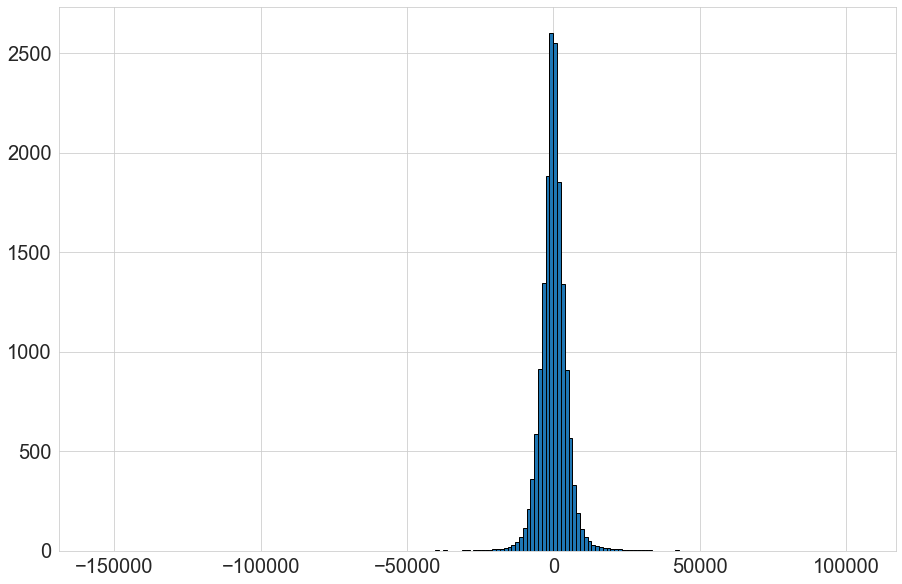

In [153]:
plt.hist(eigvals, bins=200, ec='k');

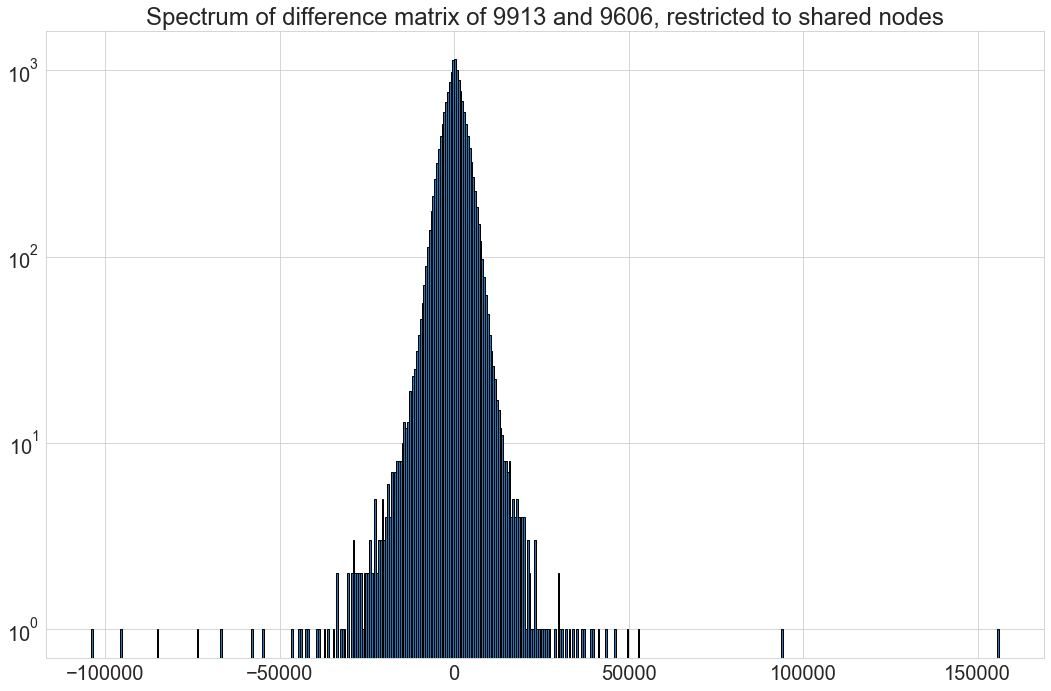

In [186]:
plt.hist(-1 * eigvals, bins=500, ec='k');
plt.yscale('log')
plt.title('Spectrum of difference matrix of 9913 and 9606, restricted to shared nodes');
plt.tight_layout()
plt.savefig('figs/diff_spectrum_9606_9913.png');

In [187]:
G_9606.size(weight="weight")

1671311203.0

In [ ]:
n = len(G.nodes())
total_pairs = 0.5 * float(n * (n-1))
print(G_9606.size(weight="weight") / total_pairs)